In [2]:
import pandas as pd

df = pd.read_csv('data/MP_queried_data_featurized_w_additional_acr_ae_en_stability_label.csv')

df

C:\Users\Zyra\AppData\Local\Temp\ipykernel_24312\930615627.py:3: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/MP_queried_data_featurized_w_additional_acr_ae_en_stability_label.csv')


,material_id,formula_pretty,crystal_system,symbol,number,point_group,symprec,version,uncorrected_energy_per_atom,energy_per_atom,...,en_mean,en_max,en_min,en_range,avg_covalent_radius,ea_mean,ea_max,ea_min,ea_range,stability_label
0,mp-573369,Cs3Nd(MoO4)3,Orthorhombic,Pnma,62,mmm,0.1,2.0.2,-6.708421,-7.647894,...,2.698421,3.44,0.79,2.65,107.368421,1.216223,1.916000,0.471626,1.444374,Stable
1,mp-28967,Ba(PdS2)2,Monoclinic,P2_1/m,11,2/m,0.1,2.0.2,-15.913734,-5.242962,...,2.230000,2.58,0.89,1.69,121.142857,1.368148,2.077104,0.144620,1.932484,Stable
2,mp-2712904,Na7Ta3Zn(SiO4)6,Trigonal,P3,143,3,0.1,2.0.2,-7.331154,-7.733301,...,2.600488,3.44,0.93,2.51,93.878049,1.205133,1.461113,0.322000,1.139113,Metastable
3,mp-1042447,TiZnBiO5,Orthorhombic,Pbca,61,mmm,0.1,2.0.2,-6.526640,-6.956015,...,2.786250,3.44,1.54,1.90,90.000000,1.189561,1.461113,0.079000,1.382113,Metastable
4,mp-2715697,Na2YNb3Si4(SO12)2,Triclinic,P1,1,1,0.1,2.0.2,-7.610403,-8.068403,...,2.866667,3.44,0.93,2.51,86.000000,1.359280,2.077104,0.307000,1.770104,Metastable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153224,mp-22426,ScSiNi,Orthorhombic,Pnma,62,mmm,0.1,2.0.2,-11.616847,-6.710994,...,1.723333,1.91,1.36,0.55,124.666667,0.911174,1.389521,0.188000,1.201521,Stable
153225,mp-1210929,MnAg2SnSe4,Orthorhombic,Pmn2_1,31,mm2,0.1,2.0.2,-4.397423,-4.633423,...,2.196250,2.55,1.55,1.00,122.375000,1.685535,2.020670,1.112067,0.908603,Stable
153226,mp-741045,Na4AlP2HO9,Orthorhombic,Pbcm,57,mmm,0.1,2.0.2,-6.254027,-6.617733,...,2.521765,3.44,0.93,2.51,92.176471,1.060116,1.461113,0.432830,1.028283,Stable
153227,mp-1209640,Tm4Ni,Cubic,Fd-3m,227,m-3m,0.1,2.0.2,-4.492395,-4.492395,...,1.382000,1.91,1.25,0.66,153.200000,1.054400,1.156000,1.029000,0.127000,Unstable


In [3]:
keep_columns = [
    # Elements
    'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
    'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
    'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo',
    'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba',
    'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
    'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po',
    'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf',
    'Es', 'Fm', 'Md', 'No', 'Lr',
    # Extra fields
    'formula_pretty', 'formation_energy_per_atom', 'energy_above_hull', 'material_id', 
    'crystal_system', 'point_group', 'symbol', 'number', 'n_atoms', 'n_elements', 'avg_atomic_mass', 'en_mean', 
    'en_max', 'en_min', 'en_range', 'avg_covalent_radius', 'ea_mean', 'ea_max', 'ea_min', 'ea_range', 'stability_label'
]

# Keep only these columns
df_filtered = df[keep_columns].copy()


df_filtered


,H,He,Li,Be,B,C,N,O,F,Ne,...,en_mean,en_max,en_min,en_range,avg_covalent_radius,ea_mean,ea_max,ea_min,ea_range,stability_label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.631579,0.0,0.0,...,2.698421,3.44,0.79,2.65,107.368421,1.216223,1.916000,0.471626,1.444374,Stable
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,2.230000,2.58,0.89,1.69,121.142857,1.368148,2.077104,0.144620,1.932484,Stable
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.585366,0.0,0.0,...,2.600488,3.44,0.93,2.51,93.878049,1.205133,1.461113,0.322000,1.139113,Metastable
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.625000,0.0,0.0,...,2.786250,3.44,1.54,1.90,90.000000,1.189561,1.461113,0.079000,1.382113,Metastable
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,...,2.866667,3.44,0.93,2.51,86.000000,1.359280,2.077104,0.307000,1.770104,Metastable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153224,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.723333,1.91,1.36,0.55,124.666667,0.911174,1.389521,0.188000,1.201521,Stable
153225,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,2.196250,2.55,1.55,1.00,122.375000,1.685535,2.020670,1.112067,0.908603,Stable
153226,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.529412,0.0,0.0,...,2.521765,3.44,0.93,2.51,92.176471,1.060116,1.461113,0.432830,1.028283,Stable
153227,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.382000,1.91,1.25,0.66,153.200000,1.054400,1.156000,1.029000,0.127000,Unstable


In [4]:
# One-hot encode both space group number and stability_label
df_encoded = pd.get_dummies(
    df_filtered,
    columns=["number", "stability_label"],
    prefix=["sg", "stability"]
)

print(df_encoded.head())

     H   He   Li   Be    B    C    N         O    F   Ne  ...  sg_224  sg_225  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.631579  0.0  0.0  ...   False   False   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   False   False   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.585366  0.0  0.0  ...   False   False   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.625000  0.0  0.0  ...   False   False   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.666667  0.0  0.0  ...   False   False   

   sg_226  sg_227  sg_228  sg_229  sg_230  stability_Metastable  \
0   False   False   False   False   False                 False   
1   False   False   False   False   False                 False   
2   False   False   False   False   False                  True   
3   False   False   False   False   False                  True   
4   False   False   False   False   False                  True   

   stability_Stable  stability_Unstable  
0              True               False  
1              True       

In [5]:
feature_cols = [
    'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
    'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
    'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 
    'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 
    'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 
    'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 
    'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
    'Es', 'Fm', 'Md', 'No', 'Lr'
]

additional = ['n_atoms', 'n_elements', 'avg_atomic_mass', 'en_mean', 
    'en_max', 'en_min', 'en_range', 'avg_covalent_radius', 'ea_mean', 'ea_max', 'ea_min', 'ea_range']

# Identify dummy columns for space group
sg_dummy_cols = [col for col in df_encoded.columns if col.startswith("sg_")]

# Identify dummy columns for stability_label
stability_dummy_cols = [col for col in df_encoded.columns if col.startswith("stability_")]

# Convert both sets of dummies to int (0/1)
df_encoded[sg_dummy_cols + stability_dummy_cols] = df_encoded[sg_dummy_cols + stability_dummy_cols].astype(int)

# Extend your feature columns with both dummy sets
all_feature_cols = feature_cols + additional + sg_dummy_cols + stability_dummy_cols


Random Forest Metrics:
MAE: 0.1891
MSE: 0.2066
RMSE: 0.4545
R²: 0.8562


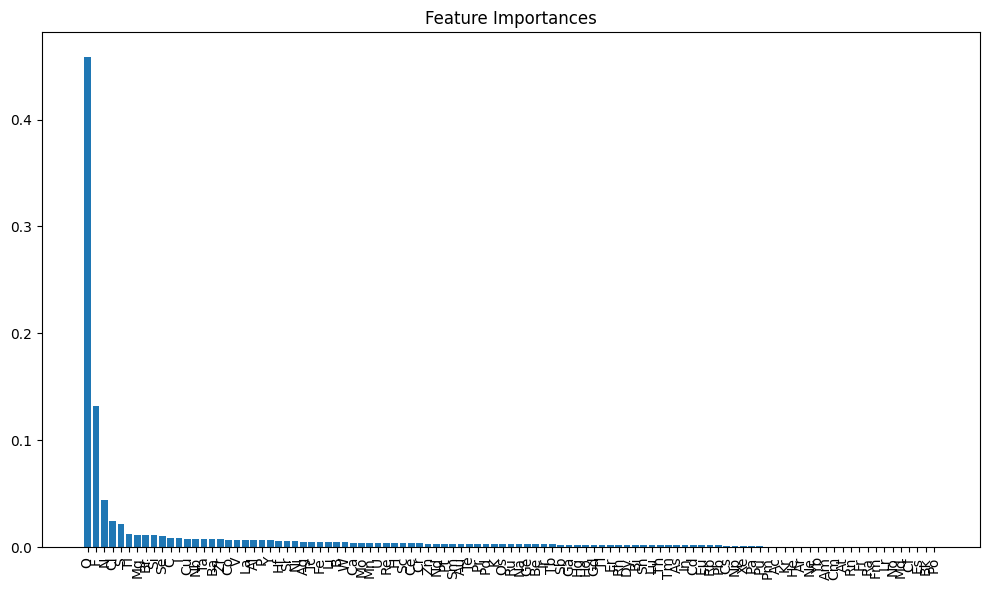

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Features and target
# -------------------------------
X = df_encoded[feature_cols]
y = df_encoded['formation_energy_per_atom']

# -------------------------------
# Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Random Forest Regressor
# -------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # allow trees to expand fully
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
y_pred = rf_model.predict(X_test)

# -------------------------------
# Evaluation metrics
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# -------------------------------
# Feature importance
# -------------------------------
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Random Forest Metrics:
MAE: 0.1719
MSE: 0.1812
RMSE: 0.4257
R²: 0.8739


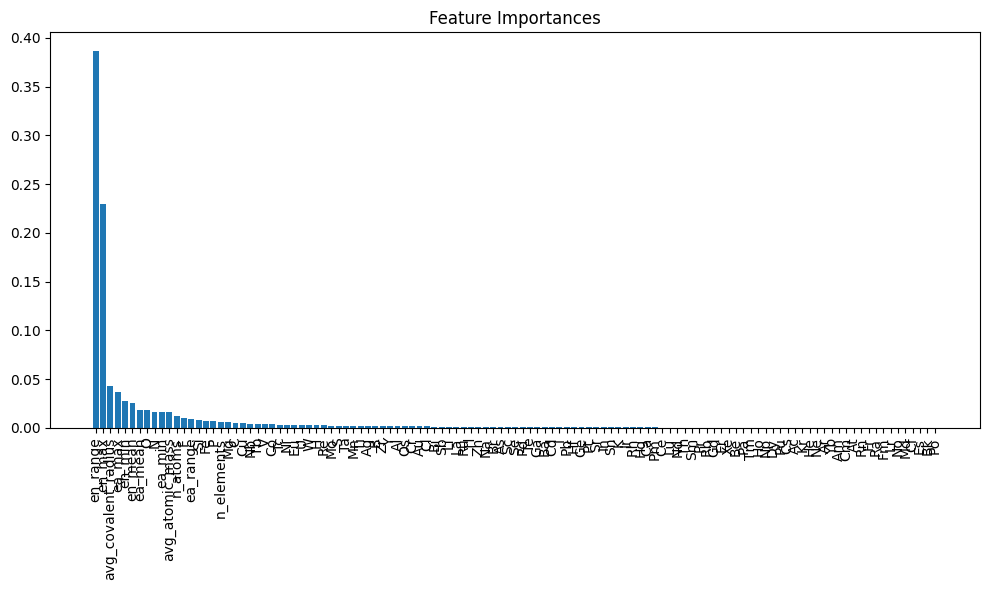

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Features and target
# -------------------------------
X = df_encoded[feature_cols + additional]
y = df_encoded['formation_energy_per_atom']

# -------------------------------
# Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Random Forest Regressor
# -------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # allow trees to expand fully
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
y_pred = rf_model.predict(X_test)

# -------------------------------
# Evaluation metrics
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# -------------------------------
# Feature importance
# -------------------------------
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Random Forest Metrics:
MAE: 0.1350
MSE: 0.1144
RMSE: 0.3383
R²: 0.9204


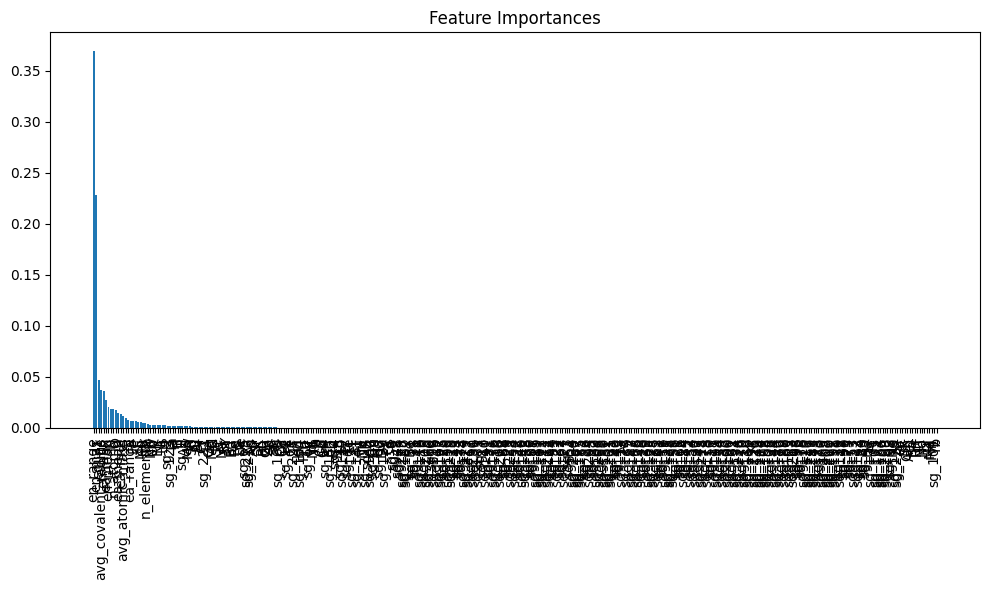

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Features and target
# -------------------------------
X = df_encoded[feature_cols + additional + sg_dummy_cols]
y = df_encoded['formation_energy_per_atom']

# -------------------------------
# Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Random Forest Regressor
# -------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # allow trees to expand fully
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
y_pred = rf_model.predict(X_test)

# -------------------------------
# Evaluation metrics
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# -------------------------------
# Feature importance
# -------------------------------
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Random Forest Metrics:
MAE: 0.1128
MSE: 0.0757
RMSE: 0.2751
R²: 0.9473


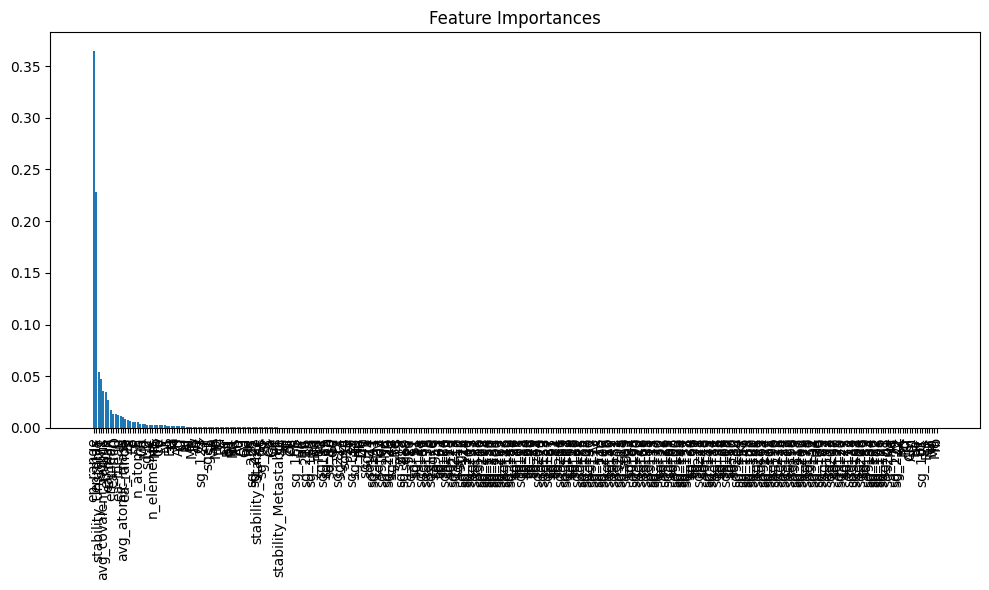

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Features and target
# -------------------------------
X = df_encoded[feature_cols + additional + sg_dummy_cols + stability_dummy_cols]
y = df_encoded['formation_energy_per_atom']

# -------------------------------
# Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Random Forest Regressor
# -------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # allow trees to expand fully
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
y_pred = rf_model.predict(X_test)

# -------------------------------
# Evaluation metrics
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# -------------------------------
# Feature importance
# -------------------------------
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


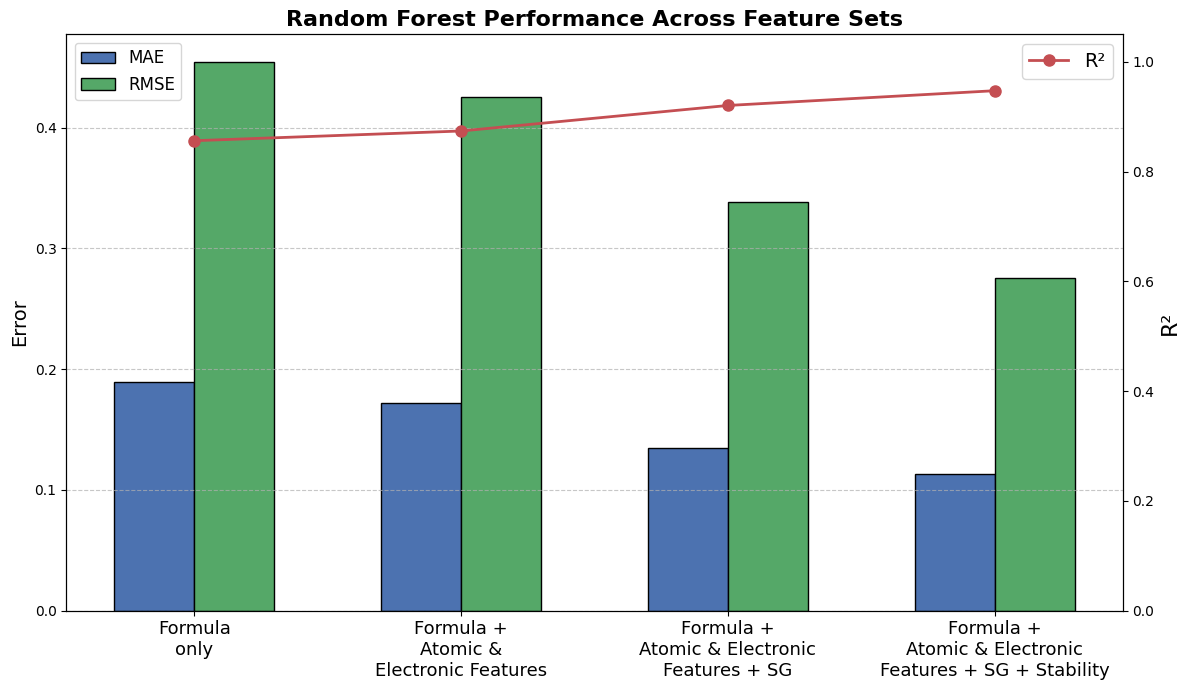

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Feature set names split into three lines
feature_sets = [
    "Formula\nonly",
    "Formula +\nAtomic &\nElectronic Features",
    "Formula +\nAtomic & Electronic\nFeatures + SG",
    "Formula +\nAtomic & Electronic\nFeatures + SG + Stability"
]

MAE = [0.1891, 0.1719, 0.1350, 0.1128]
RMSE = [0.4545, 0.4257, 0.3383, 0.2751]
R2 = [0.8562, 0.8739, 0.9204, 0.9473]

x = np.arange(len(feature_sets))
width = 0.3

fig, ax1 = plt.subplots(figsize=(12,7))

# Bar plots
ax1.bar(x - width/2, MAE, width, label="MAE", color="#4C72B0", edgecolor="black")
ax1.bar(x + width/2, RMSE, width, label="RMSE", color="#55A868", edgecolor="black")

ax1.set_ylabel("Error", fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(feature_sets, fontsize=13, ha="center")
ax1.set_title("Random Forest Performance Across Feature Sets", fontsize=16, fontweight="bold")
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# R² line plot
ax2 = ax1.twinx()
ax2.plot(x, R2, color="#C44E52", marker="o", markersize=8, label="R²", linewidth=2)
ax2.set_ylabel("R²", fontsize=16)
ax2.set_ylim(0, 1.05)
ax2.legend(loc="upper right", fontsize=14)

plt.tight_layout()
plt.show()


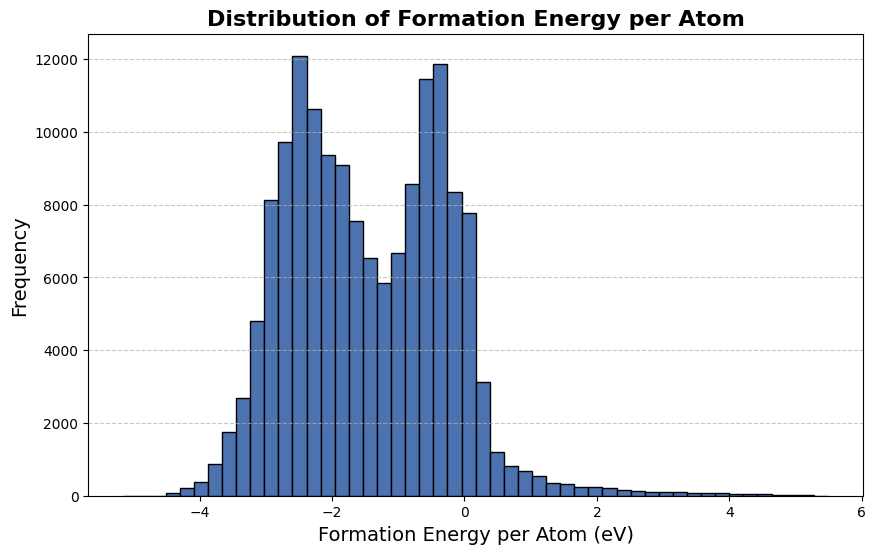

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_encoded['formation_energy_per_atom'], bins=50, color="#4C72B0", edgecolor="black")
plt.xlabel("Formation Energy per Atom (eV)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Formation Energy per Atom", fontsize=16, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


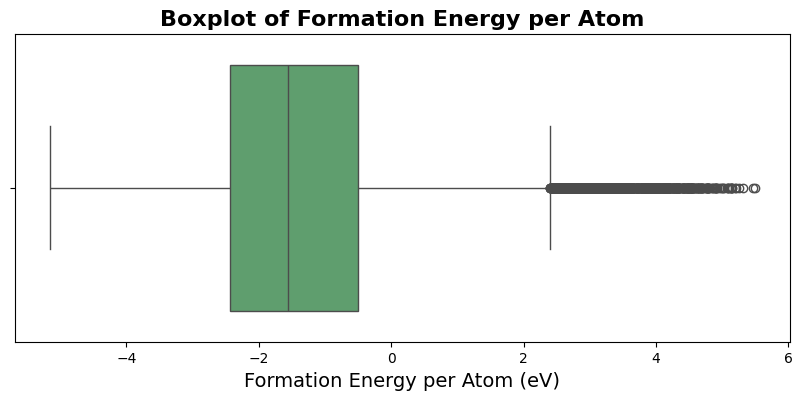

In [27]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.boxplot(x=df_encoded['formation_energy_per_atom'], color="#55A868")
plt.xlabel("Formation Energy per Atom (eV)", fontsize=14)
plt.title("Boxplot of Formation Energy per Atom", fontsize=16, fontweight="bold")
plt.show()


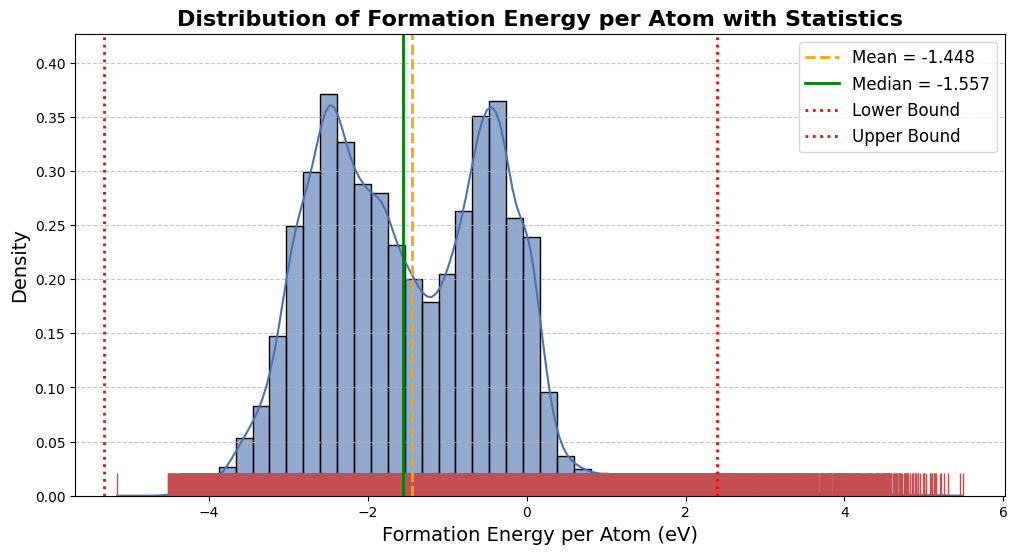

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = df_encoded['formation_energy_per_atom']
mean_val = data.mean()
median_val = data.median()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

plt.figure(figsize=(12,6))

# Histogram + KDE
sns.histplot(data, bins=50, kde=True, color="#4C72B0", edgecolor="black", stat="density", alpha=0.6)

# Rug plot
sns.rugplot(data, color="#C44E52", height=0.05)

# Mean and median
plt.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f"Mean = {mean_val:.3f}")
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f"Median = {median_val:.3f}")

# Outlier bounds
plt.axvline(lower_bound, color='red', linestyle=':', linewidth=2, label="Lower Bound")
plt.axvline(upper_bound, color='red', linestyle=':', linewidth=2, label="Upper Bound")

plt.xlabel("Formation Energy per Atom (eV)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Formation Energy per Atom with Statistics", fontsize=16, fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
